## Step 1: Generation of Synthetic Dataset

In [1]:
import pandas as pd
import numpy as np

np.random.seed(0)

dates = pd.date_range(start='2014-01-01', end='2023-12-31')

companies = ['Company ' + chr(65+i) for i in range(10)]

initial_bond_price = np.random.uniform(95, 105, len(companies))
initial_bond_yield = np.random.uniform(3, 4, len(companies))

n_days = len(dates)

bond_prices = np.zeros((n_days, len(companies)))
bond_yields = np.zeros((n_days, len(companies)))
for i in range(len(companies)):
    bond_prices[:, i] = np.linspace(initial_bond_price[i], 100, n_days) + np.random.normal(0, 0.5, n_days)
    bond_yields[:, i] = np.linspace(initial_bond_yield[i], 2, n_days) + np.random.normal(0, 0.1, n_days)

gov_bond_yields = np.linspace(1.9, 2.1, n_days) + np.random.normal(0, 0.02, n_days)

spreads = bond_yields - gov_bond_yields[:, None]

data = pd.DataFrame(bond_prices, columns=[f'{company}_Price' for company in companies], index=dates)
data = pd.concat([data, pd.DataFrame(bond_yields, columns=[f'{company}_Yield' for company in companies], index=dates)], axis=1)
data = pd.concat([data, pd.DataFrame(spreads, columns=[f'{company}_Spread' for company in companies], index=dates)], axis=1)
data['Gov_Bond_Yield'] = gov_bond_yields

data.head()

,Company A_Price,Company B_Price,Company C_Price,Company D_Price,Company E_Price,Company F_Price,Company G_Price,Company H_Price,Company I_Price,Company J_Price,...,Company B_Spread,Company C_Spread,Company D_Spread,Company E_Spread,Company F_Spread,Company G_Spread,Company H_Spread,Company I_Spread,Company J_Spread,Gov_Bond_Yield
2014-01-01,101.235175,102.779177,101.589682,100.372169,100.627531,101.535163,99.007134,103.892182,104.988946,99.357086,...,1.650830,1.805075,2.081947,1.234794,1.209218,0.990399,1.872690,2.050926,2.225472,1.881610
2014-01-02,100.385422,102.641872,100.790871,100.812247,98.707582,102.304481,99.564859,103.713447,104.896227,99.301466,...,1.513755,1.870598,1.980424,1.116727,1.145098,1.280947,1.834285,1.805849,2.072682,1.906829
2014-01-03,100.644401,103.433317,101.178672,100.534218,99.167177,101.615774,99.727840,103.635549,104.722580,98.403750,...,1.616925,1.543371,2.022068,1.155393,1.282599,0.963770,2.075879,1.622871,1.736511,1.922385
2014-01-04,100.060686,102.392876,101.007855,101.070016,99.176994,100.927352,99.554921,103.843495,104.457003,99.406813,...,1.637421,1.670810,1.926539,1.295994,1.187897,1.288122,1.936125,2.124274,2.067882,1.868688
2014-01-05,99.211105,101.333555,101.404103,100.586301,99.288516,101.787825,100.217612,104.534752,103.557322,99.044899,...,1.772478,1.748049,2.135278,0.978360,1.235683,1.229286,1.901660,1.751457,1.773055,1.932334


In [2]:
# Calculate the short-term and long-term Simple Moving Averages (SMAs) for the yield spreads.
def calculate_smas(data, short_window=10, long_window=50):
    for company in companies:
        spread_col = f'{company}_Spread'
        data[f'{company}_SMA_{short_window}'] = data[spread_col].rolling(window=short_window).mean()
        data[f'{company}_SMA_{long_window}'] = data[spread_col].rolling(window=long_window).mean()

def stochastic_oscillator(data, k_window=14, d_window=3):
    """
    Calculate the stochastic oscillator (%K and %D) for the yield spreads.
    """
    for company in companies:
        spread_col = f'{company}_Spread'
        # Calculate %K
        data[f'{company}_L14'] = data[spread_col].rolling(window=k_window).min()
        data[f'{company}_H14'] = data[spread_col].rolling(window=k_window).max()
        data[f'{company}_%K'] = 100 * ((data[spread_col] - data[f'{company}_L14']) / (data[f'{company}_H14'] - data[f'{company}_L14']))
        # Calculate %D
        data[f'{company}_%D'] = data[f'{company}_%K'].rolling(window=d_window).mean()

calculate_smas(data)
stochastic_oscillator(data)

data.loc[:, ['Company A_Spread', 'Company A_SMA_10', 'Company A_SMA_50', 'Company A_%K', 'Company A_%D']].head(-5)


,Company A_Spread,Company A_SMA_10,Company A_SMA_50,Company A_%K,Company A_%D
2014-01-01,1.775796,NaN,NaN,NaN,NaN
2014-01-02,1.960209,NaN,NaN,NaN,NaN
2014-01-03,1.809975,NaN,NaN,NaN,NaN
2014-01-04,1.819195,NaN,NaN,NaN,NaN
2014-01-05,1.781434,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-12-22,-0.171644,-0.056064,-0.090920,13.859032,41.855084
2023-12-23,-0.026872,-0.049932,-0.089788,56.339237,34.738334
2023-12-24,-0.137010,-0.053657,-0.090309,24.021398,31.406556
2023-12-25,-0.253563,-0.091206,-0.091434,0.000000,26.786878


In [3]:
def backtest_strategy_with_interest(data, start_date, initial_investment=10000):

    backtest_data = data.loc[start_date:].copy()
    cash = initial_investment
    holdings = {company: 0 for company in companies}
    portfolio_values = []  

    for date, row in backtest_data.iterrows():
        for company in companies:
            price_col = f'{company}_Price'
            yield_col = f'{company}_Yield'
            sma_short = f'{company}_SMA_10'
            sma_long = f'{company}_SMA_50'

            if row[sma_short] > row[sma_long] and cash >= row[price_col]:
                holdings[company] += 1  # Buy one bond
                cash -= row[price_col]
            elif row[sma_short] < row[sma_long] and holdings[company] > 0:
                holdings[company] -= 1  # Sell one bond
                cash += row[price_col]

        next_day_index = backtest_data.index.get_loc(date) + 1
        if next_day_index < len(backtest_data.index) and date.month != backtest_data.index[next_day_index].month:
            for company in companies:
                interest_payment = holdings[company] * row[f'{company}_Yield'] / 12 * row[f'{company}_Price'] / 100
                cash += interest_payment

        daily_portfolio_value = cash + sum(holdings[company] * row[f'{company}_Price'] for company in companies)
        portfolio_values.append(daily_portfolio_value)

    portfolio_value_df = pd.DataFrame(portfolio_values, index=backtest_data.index, columns=['Portfolio Value'])
    
    return portfolio_value_df, holdings, cash

portfolio_value_df, holdings, cash = backtest_strategy_with_interest(data, '2019-01-01')

# Show the first few rows of the portfolio value dataframe
portfolio_value_df.head()


,Portfolio Value
2019-01-01,10000.000000
2019-01-02,10000.599523
2019-01-03,10001.654306
2019-01-04,10000.781546
2019-01-05,10005.130109


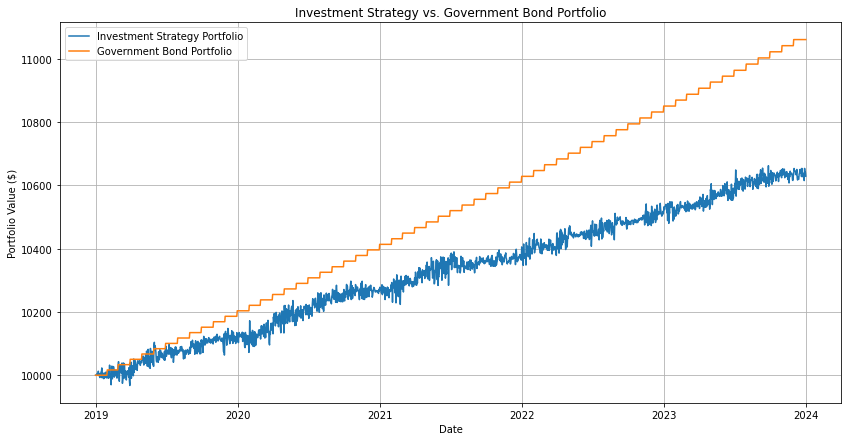

In [4]:
import matplotlib.pyplot as plt

def calculate_gov_bond_portfolio(data, start_date, initial_investment=10000):
    gov_bond_data = data.loc[start_date:, 'Gov_Bond_Yield']
    cash = initial_investment
    portfolio_values = []

    for date, yield_value in gov_bond_data.items():
        # Simulate monthly interest payment
        next_day_index = gov_bond_data.index.get_loc(date) + 1
        if next_day_index < len(gov_bond_data.index) and date.month != gov_bond_data.index[next_day_index].month:
            interest_payment = cash * yield_value / 12 / 100
            cash += interest_payment

        portfolio_values.append(cash)

    portfolio_value_df = pd.DataFrame(portfolio_values, index=gov_bond_data.index, columns=['Gov Bond Portfolio'])
    return portfolio_value_df

# Calculate the government bond portfolio value
gov_bond_portfolio = calculate_gov_bond_portfolio(data, '2019-01-01')

# Combine the investment strategy portfolio and government bond portfolio for comparison
combined_portfolio = pd.concat([portfolio_value_df, gov_bond_portfolio], axis=1)

# Plotting the comparison
plt.figure(figsize=(14, 7))
plt.plot(combined_portfolio.index, combined_portfolio['Portfolio Value'], label='Investment Strategy Portfolio')
plt.plot(combined_portfolio.index, combined_portfolio['Gov Bond Portfolio'], label='Government Bond Portfolio')
plt.title('Investment Strategy vs. Government Bond Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()



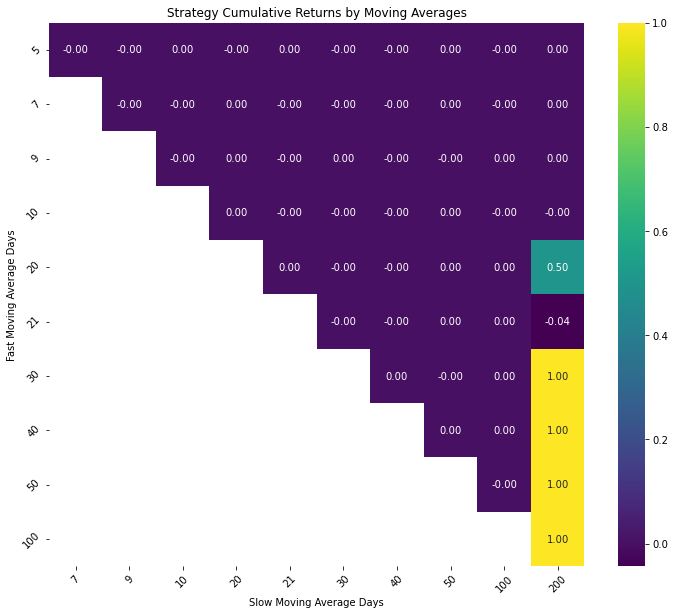

In [9]:

import seaborn as sns

def calculate_strategy_returns(data, fast_ma, slow_ma):
    """
    Calculate strategy returns based on moving average crossover.
    """
    data['fast_ma'] = data['Company A_Spread'].rolling(window=fast_ma).mean()
    data['slow_ma'] = data['Company A_Spread'].rolling(window=slow_ma).mean()
    data['signal'] = np.where(data['fast_ma'] > data['slow_ma'], 1.0, 0.0)
    data['returns'] = data['Company A_Spread'].pct_change()
    data['strategy_returns'] = data['signal'].shift(1) * data['returns']
    return (data['strategy_returns'] + 1).cumprod()[-1]

# Define your range of fast and slow moving averages
fast_ma_range = [5, 7, 9, 10, 20, 21, 30, 40, 50, 100]
slow_ma_range = [7, 9, 10, 20, 21, 30, 40, 50, 100, 200]

# Initialize an empty DataFrame to store returns
returns_matrix = pd.DataFrame(index=fast_ma_range, columns=slow_ma_range)

# Populate the DataFrame with strategy returns for each combination of moving averages
for fast_ma in fast_ma_range:
    for slow_ma in slow_ma_range:
        if fast_ma < slow_ma:  # Ensuring slow_ma is greater than fast_ma
            returns_matrix.at[fast_ma, slow_ma] = calculate_strategy_returns(data, fast_ma, slow_ma)

# Now generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(returns_matrix.astype(float), annot=True, cmap='viridis', fmt=".2f")
plt.title('Strategy Cumulative Returns by Moving Averages')
plt.xlabel('Slow Moving Average Days')
plt.ylabel('Fast Moving Average Days')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()